<a href="https://colab.research.google.com/github/soerenml/colab/blob/master/Intro_Tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Tensorflow 2.0

#### Requirements
*To use TF2.0 uninstall TF1.x first and reinstall TF2.0 afterwards.*

#### Learning
*First steps into TF2.0, no pipelining, no distributed trained etc.*

#### Source
*This tutorial closely follows A. Geron (2019), pp. 277-330.*

In [0]:
%%capture
pip uninstall tensorflow

In [0]:
%%capture
pip install tensorflow==2.0

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 2.0.0


In [0]:
'''
Load the dataset using the Keras API.
'''
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
'''
Inspect the data.
The training data as numpy array of 60k rows with two 28*28 dimensions.
As the image data is non-RGB, no fourth dimension is needed. 
'''
X_train.shape

(60000, 28, 28)

In [0]:
'''
Create the model using the sequential API
Flatten is used to create several one-dimensional array 60k times (1x784).
The first two dense-layers are fully connected layers with a relu function.
The final layer is dense with a softmax function, returning the probabilities
of each of the n classes defined (10 in our case.)
'''
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  tf.keras.layers.Dense(300, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])                                  

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The parameters are the result of the architecture.
As layers are fully connected, every neuron is connected to the neuron of the following layers. Hence, 1 neuron * 300 neurons for 784 neurons = 23,5200 plus 300 as the bias of layer 1 affects all neurons of layer 2 leads to 23,500 parameters.

In [0]:
# Show layers
print(model.layers)

# Select a layer
layer_3 = model.layers[2]
print(layer_3)

weights, biases = layer_3.get_weights()

print("Weights layer 3: {}".format(weights))
print("Weights shape: {}".format(weights.shape))
print("Bias shape: {}".format(biases.shape))

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f74677bed30>, <tensorflow.python.keras.layers.core.Dense object at 0x7f7465e48a20>, <tensorflow.python.keras.layers.core.Dense object at 0x7f7465e48d68>, <tensorflow.python.keras.layers.core.Dense object at 0x7f74677ae080>]
Weights layer 3: [[ 0.09645572  0.09454302  0.00246599 ...  0.06452235 -0.11981402
  -0.04229549]
 [ 0.065314   -0.07592745  0.01342802 ... -0.06660976  0.05074888
  -0.02451952]
 [-0.00216759  0.06122945 -0.07325423 ... -0.01840596 -0.10559181
   0.06974203]
 ...
 [-0.06182934  0.08892875 -0.05144142 ... -0.02601007  0.08753143
  -0.00588284]
 [-0.06274885  0.06026141 -0.01010618 ...  0.09912228 -0.03216457
  -0.08792911]
 [ 0.10556804 -0.03301172 -0.01883246 ... -0.11014979 -0.05590806
  -0.07224125]]
Weights shape: (300, 100)
Bias shape: (100,)


In [0]:
'''
Compile the model
I am using the tf.keras.losses.sparse_categorical_crossentropy etc.
for simplicity.
'''
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.1),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [0]:
import datetime, os

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
53920/54000 [============================>.] - ETA: 0s - loss: nan - sparse_categorical_accuracy: 0.0994

InvalidArgumentError: ignored

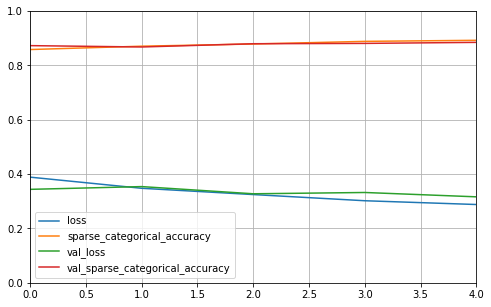

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 1s - loss: 32.7774 - sparse_categorical_accuracy: 0.8279


[64.94065455970764, 0.8279]

In [0]:
%load_ext tensorboard


RuntimeError: ignored

In [0]:
import keras 
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

Using TensorFlow backend.


32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'